# Chapter 14
## Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

np.random.seed(0)

## Dataset

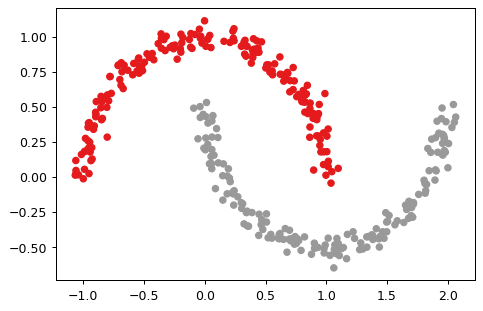

In [2]:
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl, test_size=0.3, random_state=0)
cmap_set1 = plt.cm.Set1
_, ax = plt.subplots(dpi=90)
ax.scatter(*np.transpose(X), s=25, c=y, cmap=cmap_set1)
plt.show()

## Neural networks

In [3]:
model = Sequential(
    [
        Input(2,),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid'),
    ]
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, y, epochs=1000, batch_size=32, verbose=0)

In [ ]:
predictions = (model.predict(Xt) >= 0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy}")

### Plotting the decision boundary

In [ ]:
steps = 100
x_range = np.linspace(coord[:,0].min(), coord[:,0].max(), steps)
y_range = np.linspace(coord[:,1].min(), coord[:,1].max(), steps)

xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
pp = model.predict(xy)
pp = pp.reshape(yy.shape)

cmap_rb = plt.get_cmap('RdBu')
_, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, pp, cmap=cmap_rb, alpha=0.3, levels=3)
ax.scatter(*np.transpose(coord), s=25, c=cl, cmap=cmap_set1)
plt.show()

### Convolutional neural networks

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

_, ax = plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]], c='white')
plt.show()